### Analysis of Training and Test Statistics

In [26]:

import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
# load training stats from training_stats.pkl
filename = 'training_stats.pkl'
if os.path.exists(filename):
    with open(filename, 'rb') as f:
        stats = pickle.load(f)
        
# Create arrays to store the result counts
victories = np.zeros(len(stats['results']))
defeats = np.zeros(len(stats['results']))
timeouts = np.zeros(len(stats['results']))
total_runs = np.array([i+1 for i in range(len(stats['results']))])

# Count results for each run
for i, result in enumerate(stats['results']):
    if result == 'victory':
        victories[i] = 1
    elif result == 'defeat':
        defeats[i] = 1
    elif result == 'timeout':
        timeouts[i] = 1

# Calculate cumulative sums
cumulative_victories = np.cumsum(victories)
cumulative_defeats = np.cumsum(defeats)
cumulative_timeouts = np.cumsum(timeouts)

# Calculate relative cumulative percentages
relative_victories = cumulative_victories / total_runs * 100
relative_defeats = cumulative_defeats / total_runs * 100
relative_timeouts = cumulative_timeouts / total_runs * 100


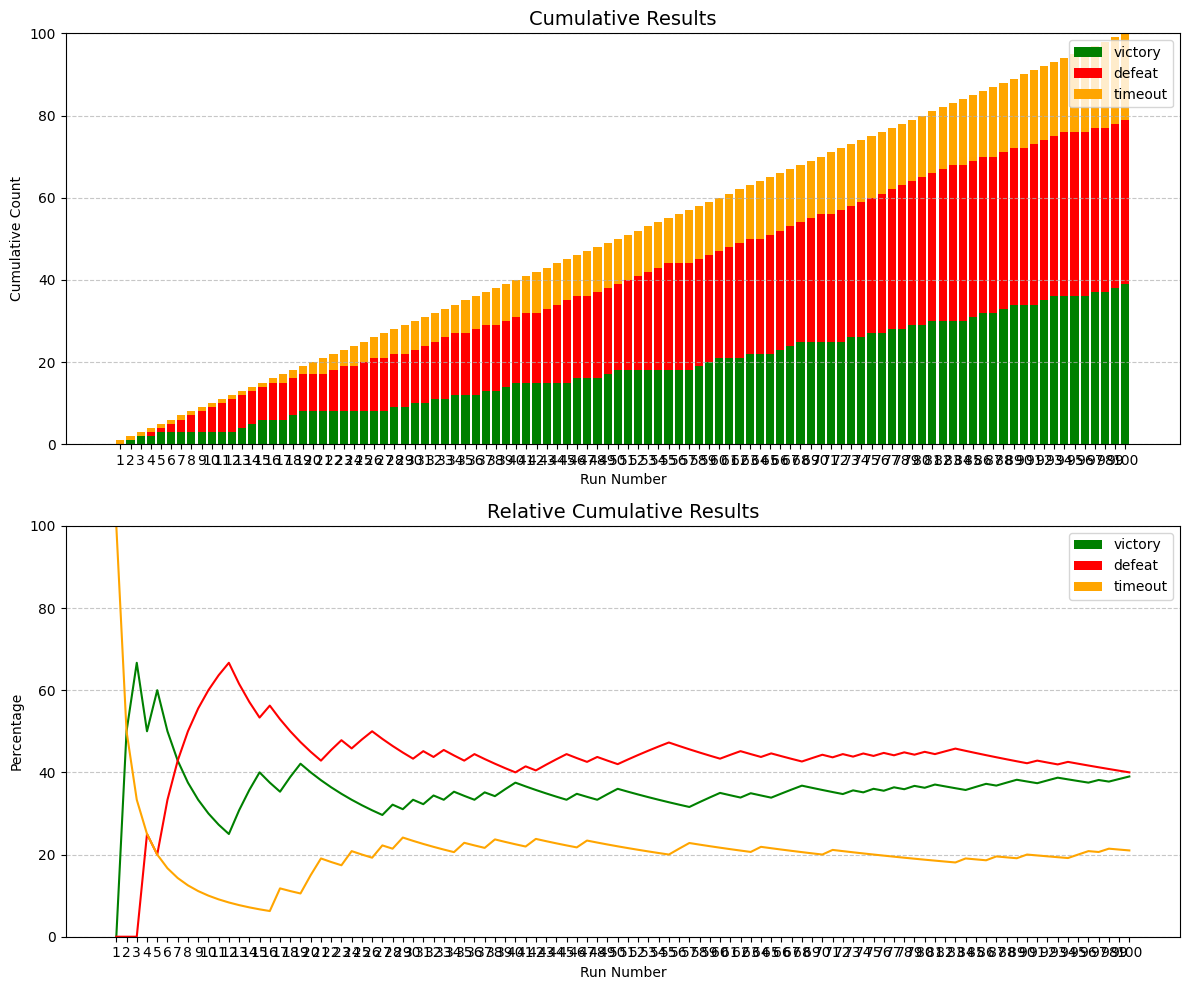

In [30]:
# Plot the absolute and relative victory, defeat, and timeout percentages over the runs

# Create a figure with multiple subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Set colors for different results
color_map = {'victory': 'green', 'defeat': 'red', 'timeout': 'orange'}
colors = [color_map[result] for result in stats['results']]

# Plot 1: Absolute cumulative results as stacked bars
ax1.bar(total_runs, cumulative_victories, color=color_map['victory'], label='Victories')
ax1.bar(total_runs, cumulative_defeats, bottom=cumulative_victories, color=color_map['defeat'], label='Defeats')
ax1.bar(total_runs, cumulative_timeouts, bottom=cumulative_victories + cumulative_defeats, color=color_map['timeout'], label='Timeouts')

ax1.set_title('Cumulative Results', fontsize=14)
ax1.set_xlabel('Run Number')
ax1.set_ylabel('Cumulative Count')
ax1.set_xticks(total_runs)
ax1.set_ylim(0, len(stats['results']))
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the colors
legend_elements = [Patch(facecolor=color, label=result) 
                  for result, color in color_map.items()]
ax1.legend(handles=legend_elements, loc='upper right')

# Plot 2: Relative cumulative results as line plots
ax2.plot(total_runs, relative_victories, color=color_map['victory'], label='Victory %')
ax2.plot(total_runs, relative_defeats, color=color_map['defeat'], label='Defeat %')
ax2.plot(total_runs, relative_timeouts, color=color_map['timeout'], label='Timeout %')

ax2.set_title('Relative Cumulative Results', fontsize=14)
ax2.set_xlabel('Run Number')
ax2.set_ylabel('Percentage')
ax2.set_xticks(total_runs)
ax2.set_ylim(0, 100)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()